In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Apr  9 14:08:44 2021

@author: brianmerino

This code is meant to be a quicker version of my Background_w_mask.py code. Instead of running over 
an entire catalog of galaxies, it runs over a few at a time.
"""
import numpy as np
import matplotlib.pyplot as plt
import sys
import astropy
from photutils import Background2D
from astropy.visualization import simple_norm
from photutils import make_source_mask
from astropy.stats import mad_std
from astropy.table import Table
import configparser
import time

In [2]:
t0 = time.time()


def Background(image, head, name, norm, sigma):
    # I am defining variables x and y to be the box size that Background2D uses.
    # Greg recommended using around 36 boxes in total, so I am taking 2*head['CRPIX1'] to be
    # the width of the image, then I divide by 3 so that 3x3 boxes will cover the image.
    x = int(2*head['CRPIX1']/6)
    y = int(2*head['CRPIX2']/6)
    
    sigma = sigma
    
    mask = make_source_mask(image, nsigma=sigma, npixels=3, dilate_size=10)
    bkg = Background2D(image, (x,y), sigma_clip = None, mask = mask,exclude_percentile=50)
    #bkg = Background2D(image, (x,y), mask=mask)
    
    
    # This adjusts the stretch for the background image
    bkg_min, bkg_max = np.min(bkg.background), np.max(bkg.background)
    
    # This changes the scale of the color bars. The default is too big
    scale = 0.85
    
    
    bs  = image - bkg.background
    
    fig, axs = plt.subplots(2, 4, figsize=(16,7))
    
    # This plots the original image with colorbar
    im1 = axs[0,0].imshow(image, origin='lower', cmap='Greys_r', norm=norm)
    axs[0,0].set_title('(a) %s'%(name))
    fig.colorbar(im1, ax=axs[0,0], shrink=scale)
    
    
    # This plots the background
    im3 = axs[0,1].imshow(bkg.background, origin='lower', cmap='Greys_r', norm=norm)
    axs[0,1].set_title('(b) Background')
    fig.colorbar(im3, ax=axs[0,1], shrink=scale)
    
    
    # This plots the background subtracted image and saves it as a new fits file
    im4 = axs[0,2].imshow(bs, origin='lower', cmap='Greys_r', norm=norm)
    axs[0,2].set_title('(c) Background Subtracted')
    fig.colorbar(im4, ax=axs[0,2], shrink=scale)
    
    hdu2 = astropy.io.fits.PrimaryHDU(bs,header=head)
    hdu2.writeto(save_bs,overwrite=True)
    
    
    # This plots the background
    im2 = axs[0,3].imshow(bkg.background, origin='lower', cmap='Greys_r' , vmin=bkg_min, vmax=bkg_max)
    axs[0,3].set_title('(d) Background')
    fig.colorbar(im2, ax=axs[0,3], shrink=scale)
    
    
    # This plots the mask
    axs[1,0].imshow(mask, origin='lower', cmap='Greys_r')
    axs[1,0].set_title('(e) %s sigma mask'%(sigma))
    #fig.colorbar(im2, ax=axs[0,2], shrink=scale)
    ratio = 0.8
    axs[1,0].set_aspect(1.0/axs[1,0].get_data_ratio()*ratio)
    
    
    # This plots a histogram of the pixels in the original image
    axs[1,1].hist(data.flatten(),35, label = 'Original')
    axs[1,1].set_title('(f) Histogram')
    axs[1,1].legend()
    #This histogram kept streching vertically. These two lines resolve that issue.
    ratio = 0.85
    axs[1,1].set_aspect(1.0/axs[1,1].get_data_ratio()*ratio)
    
    
    axs[1,2].hist(bs.flatten(),35, label = 'B.S.', color='orange')
    axs[1,2].set_title('(g) Histogram')
    axs[1,2].legend()
    #This histogram kept streching vertically. These two lines resolve that issue.
    ratio = 0.85
    axs[1,2].set_aspect(1.0/axs[1,2].get_data_ratio()*ratio)
    
    
    # This plots the original image with the grid used for background subtraction overlayed on top.
    # This plot needs to be last because the gridsize keeps applying itself to the last plot in the subplot
    im6 = axs[1,3].imshow(image, origin='lower', cmap='Greys_r', norm=norm)
    bkg.plot_meshes(outlines=True, color='red')
    axs[1,3].set_title('(h) Mesh Grid')
    fig.colorbar(im6, ax=axs[1,3], shrink=scale)
    
    plt.savefig(save_png)
    plt.show()
    
    print()
    print('Background = ',mad_std(image))
    
    hdu1 = astropy.io.fits.PrimaryHDU(bkg.background,header=head)
    hdu1.writeto(save_bkg,overwrite=True)

In [3]:
Filter_1 = ['f277w','f356w','f444w']

In [4]:
# Read in catalog of clumpy galaxies
cat_path = '/Users/brian.merino/Desktop/JWST/RELICS/large_clump_sources_v2.cat'
catalog = Table.read(cat_path,format='ascii')

sigma = 1.5

#cluster = config.get('CONFIG','cluster')
#ID = int(config.get('CONFIG','Id'))

FILTER = Filter_1
catalog.show_in_notebook()

idx,ra,dec,rad,rad_pix,cluster,ID,zb
0,110.7912283,-73.4391504,2.0,50,smacs0723,2038,0.72
1,110.8210877,-73.4414434,1.438,36,smace0723,2546,1.13
2,110.7566116,-73.4460512,2.0,50,smacs0723,2868,0.783
3,110.798628,-73.4486724,4.186,105,smacs0723,3225,1.184
4,110.871365,-73.4554603,1.597,40,smacs0723,4021,1.069
5,110.7796974,-73.4580321,2.93,73,smacs0723,4193,0.319
6,110.857521,-73.4663915,2.579,64,smacs0723,5276,1.001
7,110.8743203,-73.4643105,2.15,54,smacs0723,5364,0.25


        Use SegmentationImage.make_source_mask instead. [warnings]


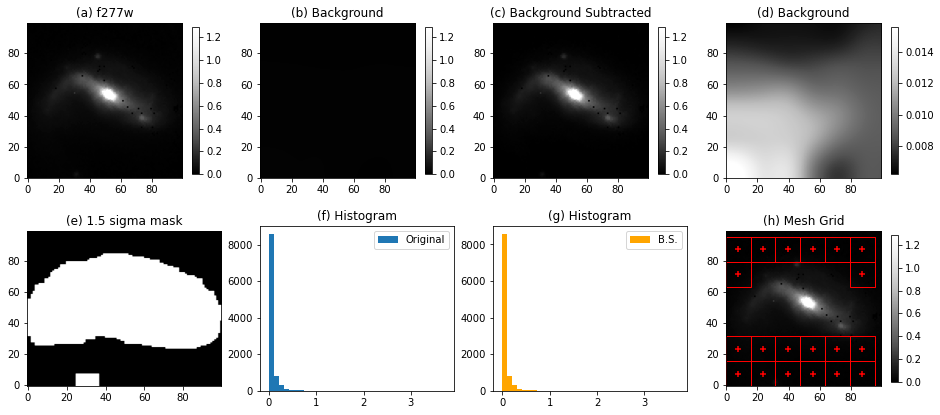


Background =  0.021885098589272848

Background subtracted image saved to /Users/brian.merino/Desktop/JWST/RELICS/BS_files/bs/f277w_2038_bs.fits
Background saved to /Users/brian.merino/Desktop/JWST/RELICS/BS_files/bkg/f277w_2038_bkg.fits



        Use SegmentationImage.make_source_mask instead. [warnings]


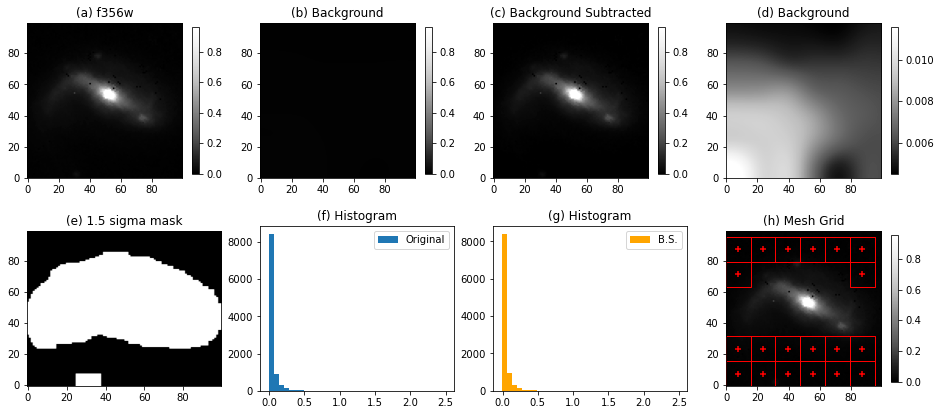


Background =  0.01563800387870184

Background subtracted image saved to /Users/brian.merino/Desktop/JWST/RELICS/BS_files/bs/f356w_2038_bs.fits
Background saved to /Users/brian.merino/Desktop/JWST/RELICS/BS_files/bkg/f356w_2038_bkg.fits



        Use SegmentationImage.make_source_mask instead. [warnings]


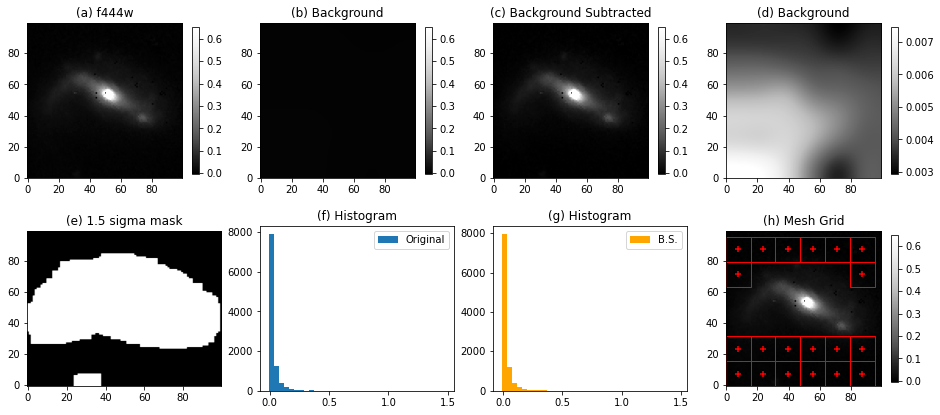


Background =  0.010981019922107198

Background subtracted image saved to /Users/brian.merino/Desktop/JWST/RELICS/BS_files/bs/f444w_2038_bs.fits
Background saved to /Users/brian.merino/Desktop/JWST/RELICS/BS_files/bkg/f444w_2038_bkg.fits



        Use SegmentationImage.make_source_mask instead. [warnings]


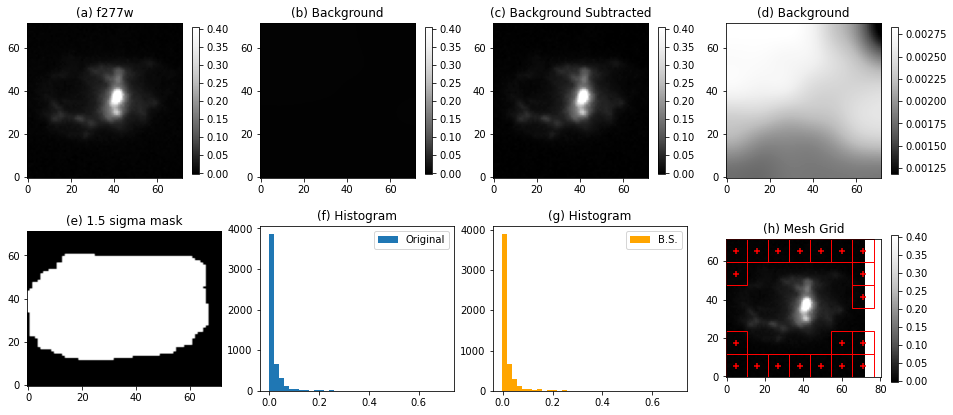


Background =  0.006370383257714484

Background subtracted image saved to /Users/brian.merino/Desktop/JWST/RELICS/BS_files/bs/f277w_2546_bs.fits
Background saved to /Users/brian.merino/Desktop/JWST/RELICS/BS_files/bkg/f277w_2546_bkg.fits



        Use SegmentationImage.make_source_mask instead. [warnings]


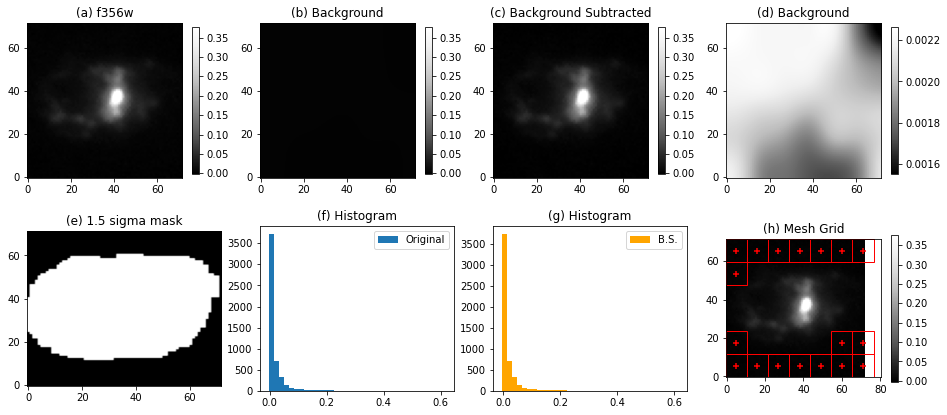


Background =  0.0059897364788976315

Background subtracted image saved to /Users/brian.merino/Desktop/JWST/RELICS/BS_files/bs/f356w_2546_bs.fits
Background saved to /Users/brian.merino/Desktop/JWST/RELICS/BS_files/bkg/f356w_2546_bkg.fits



        Use SegmentationImage.make_source_mask instead. [warnings]


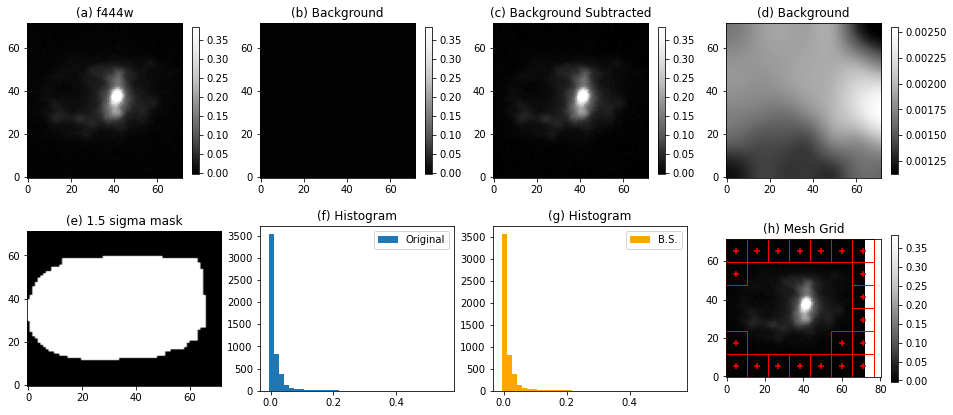


Background =  0.00581243799586294

Background subtracted image saved to /Users/brian.merino/Desktop/JWST/RELICS/BS_files/bs/f444w_2546_bs.fits
Background saved to /Users/brian.merino/Desktop/JWST/RELICS/BS_files/bkg/f444w_2546_bkg.fits



        Use SegmentationImage.make_source_mask instead. [warnings]


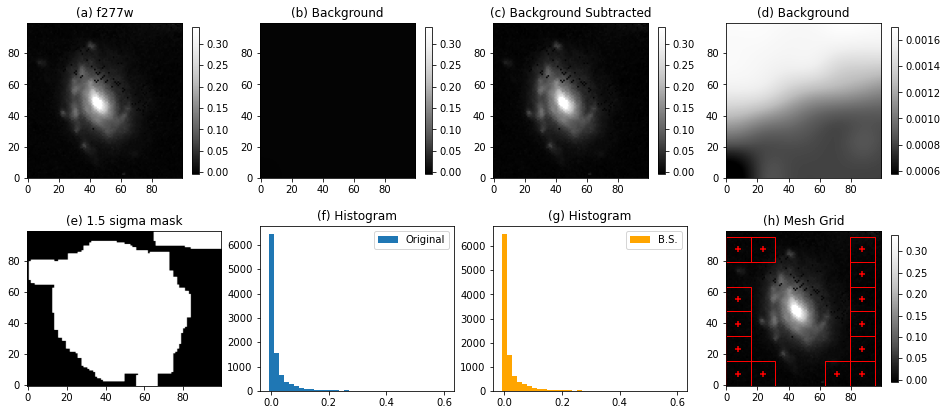


Background =  0.007034422201971657

Background subtracted image saved to /Users/brian.merino/Desktop/JWST/RELICS/BS_files/bs/f277w_2868_bs.fits
Background saved to /Users/brian.merino/Desktop/JWST/RELICS/BS_files/bkg/f277w_2868_bkg.fits



        Use SegmentationImage.make_source_mask instead. [warnings]


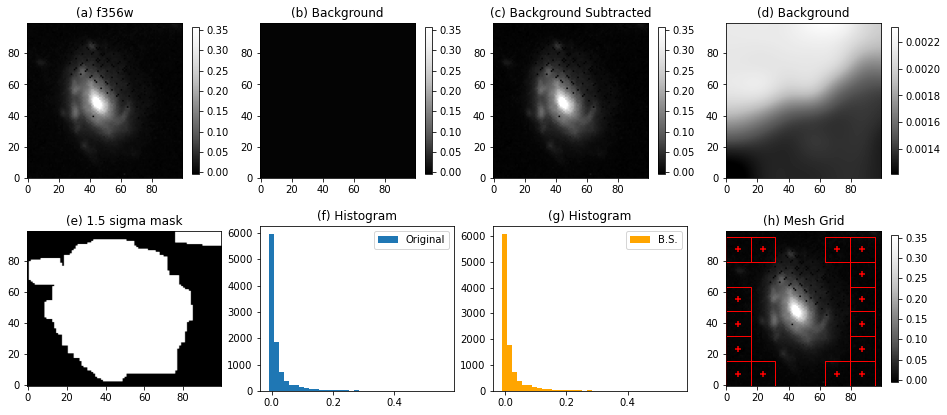


Background =  0.006200929681449895

Background subtracted image saved to /Users/brian.merino/Desktop/JWST/RELICS/BS_files/bs/f356w_2868_bs.fits
Background saved to /Users/brian.merino/Desktop/JWST/RELICS/BS_files/bkg/f356w_2868_bkg.fits



        Use SegmentationImage.make_source_mask instead. [warnings]


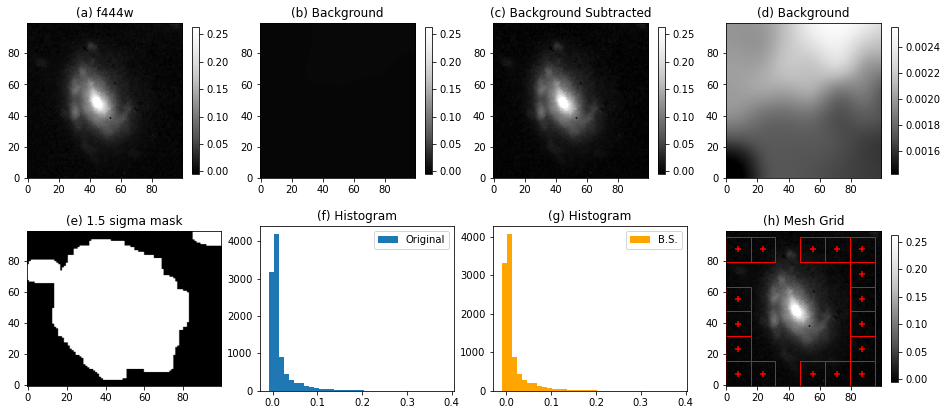


Background =  0.006100679463877686

Background subtracted image saved to /Users/brian.merino/Desktop/JWST/RELICS/BS_files/bs/f444w_2868_bs.fits
Background saved to /Users/brian.merino/Desktop/JWST/RELICS/BS_files/bkg/f444w_2868_bkg.fits



        Use SegmentationImage.make_source_mask instead. [warnings]


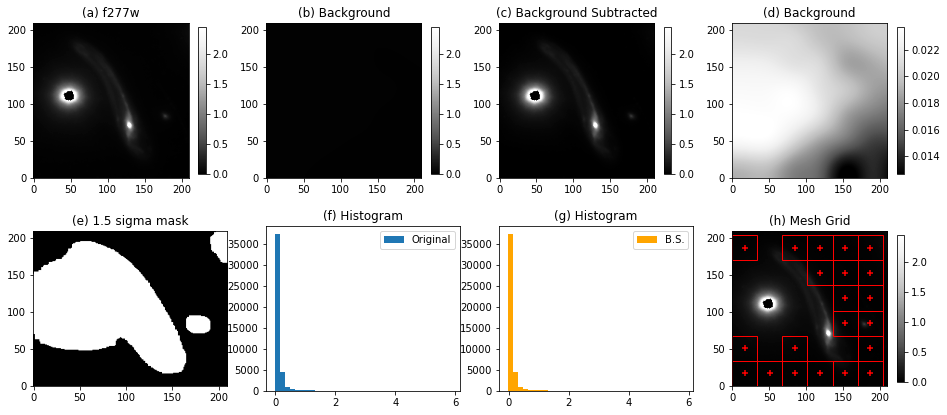


Background =  0.02820913317400449

Background subtracted image saved to /Users/brian.merino/Desktop/JWST/RELICS/BS_files/bs/f277w_3225_bs.fits
Background saved to /Users/brian.merino/Desktop/JWST/RELICS/BS_files/bkg/f277w_3225_bkg.fits



        Use SegmentationImage.make_source_mask instead. [warnings]


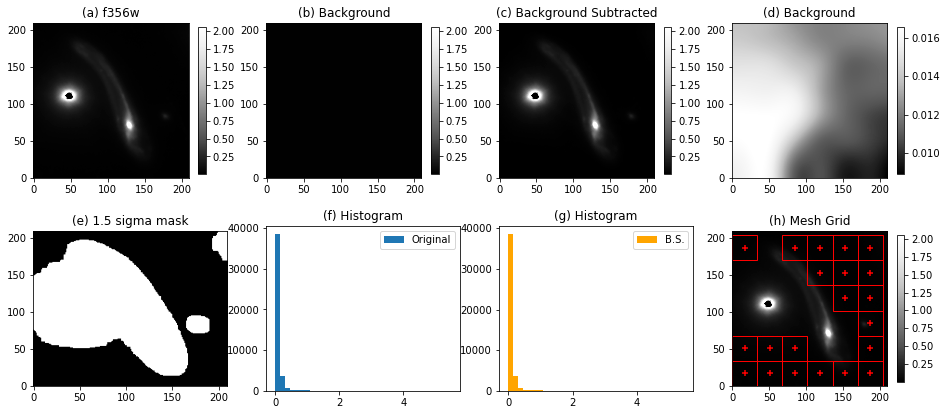


Background =  0.020405221789276545

Background subtracted image saved to /Users/brian.merino/Desktop/JWST/RELICS/BS_files/bs/f356w_3225_bs.fits
Background saved to /Users/brian.merino/Desktop/JWST/RELICS/BS_files/bkg/f356w_3225_bkg.fits



        Use SegmentationImage.make_source_mask instead. [warnings]


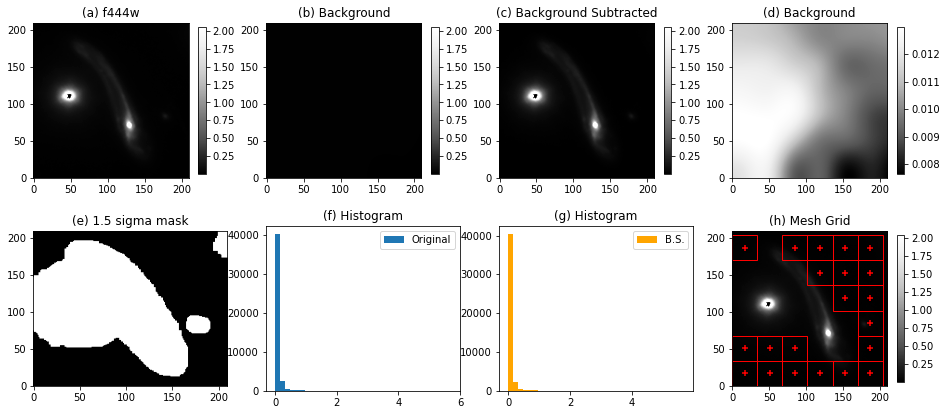


Background =  0.016227669130129407

Background subtracted image saved to /Users/brian.merino/Desktop/JWST/RELICS/BS_files/bs/f444w_3225_bs.fits
Background saved to /Users/brian.merino/Desktop/JWST/RELICS/BS_files/bkg/f444w_3225_bkg.fits



        Use SegmentationImage.make_source_mask instead. [warnings]


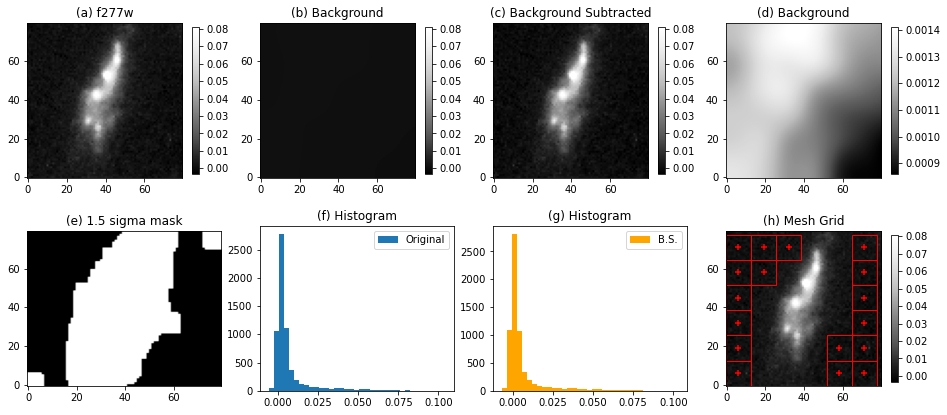


Background =  0.003001415212158565

Background subtracted image saved to /Users/brian.merino/Desktop/JWST/RELICS/BS_files/bs/f277w_4021_bs.fits
Background saved to /Users/brian.merino/Desktop/JWST/RELICS/BS_files/bkg/f277w_4021_bkg.fits



        Use SegmentationImage.make_source_mask instead. [warnings]


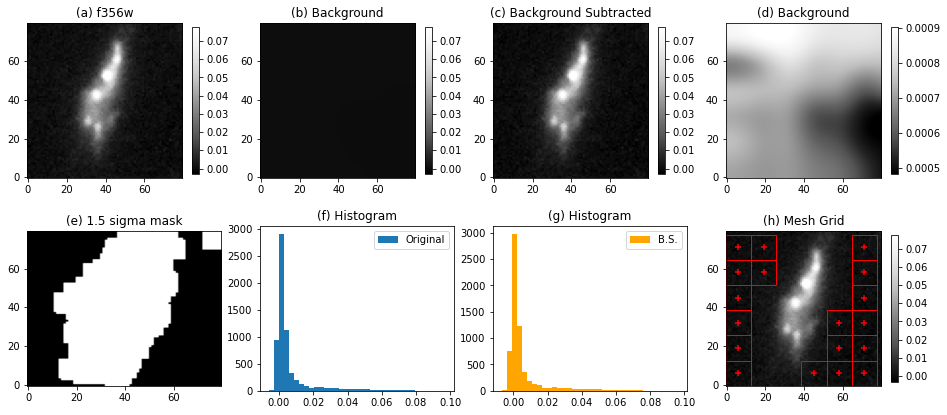


Background =  0.0027191112746770916

Background subtracted image saved to /Users/brian.merino/Desktop/JWST/RELICS/BS_files/bs/f356w_4021_bs.fits
Background saved to /Users/brian.merino/Desktop/JWST/RELICS/BS_files/bkg/f356w_4021_bkg.fits



        Use SegmentationImage.make_source_mask instead. [warnings]


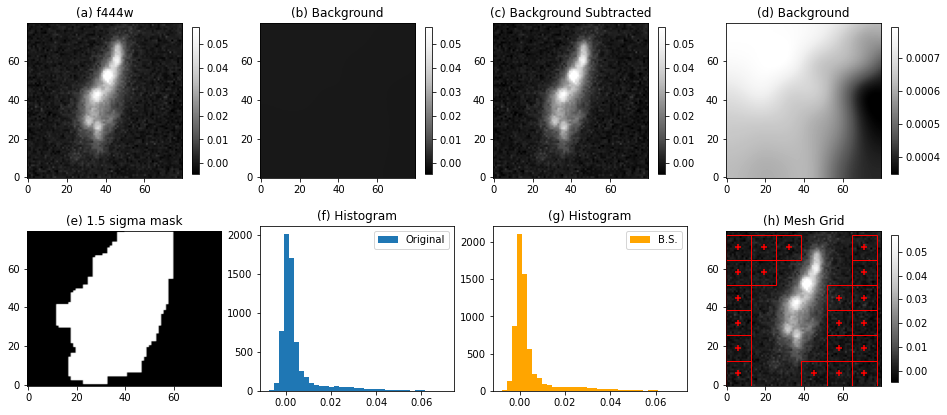


Background =  0.0027632525967692624

Background subtracted image saved to /Users/brian.merino/Desktop/JWST/RELICS/BS_files/bs/f444w_4021_bs.fits
Background saved to /Users/brian.merino/Desktop/JWST/RELICS/BS_files/bkg/f444w_4021_bkg.fits



        Use SegmentationImage.make_source_mask instead. [warnings]


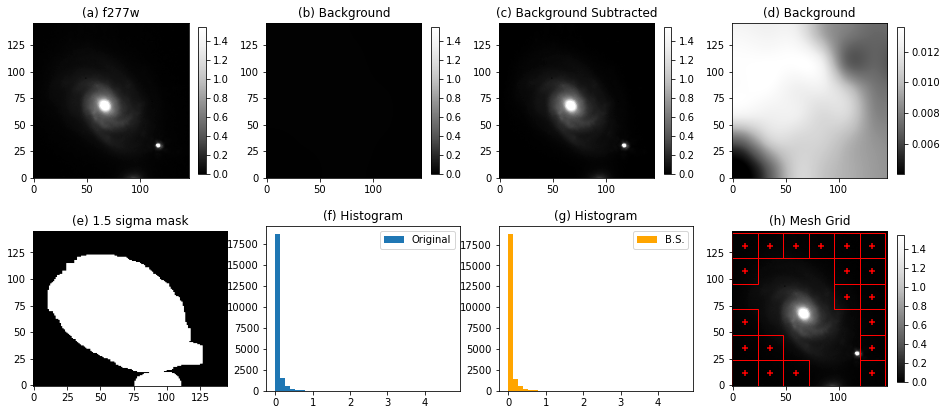


Background =  0.02594606639262014

Background subtracted image saved to /Users/brian.merino/Desktop/JWST/RELICS/BS_files/bs/f277w_4193_bs.fits
Background saved to /Users/brian.merino/Desktop/JWST/RELICS/BS_files/bkg/f277w_4193_bkg.fits



        Use SegmentationImage.make_source_mask instead. [warnings]


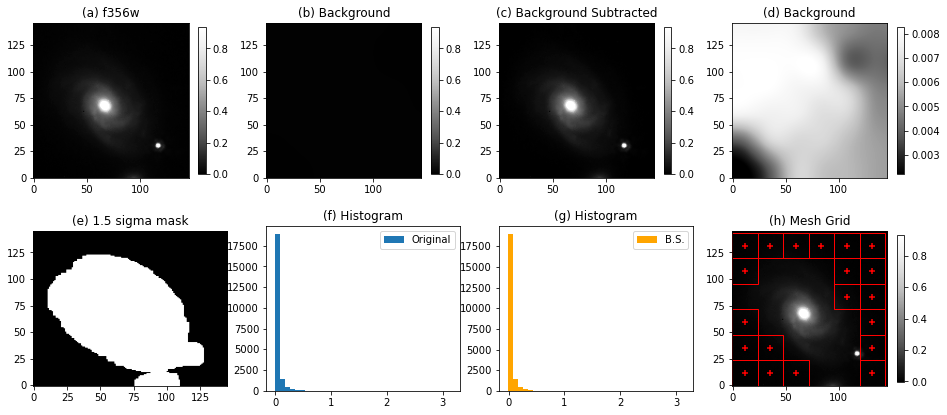


Background =  0.015758824970349732

Background subtracted image saved to /Users/brian.merino/Desktop/JWST/RELICS/BS_files/bs/f356w_4193_bs.fits
Background saved to /Users/brian.merino/Desktop/JWST/RELICS/BS_files/bkg/f356w_4193_bkg.fits



        Use SegmentationImage.make_source_mask instead. [warnings]


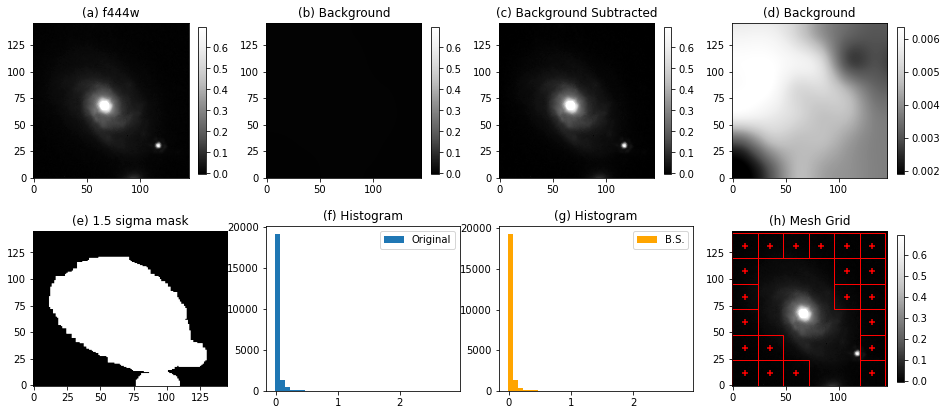


Background =  0.01197453252368043

Background subtracted image saved to /Users/brian.merino/Desktop/JWST/RELICS/BS_files/bs/f444w_4193_bs.fits
Background saved to /Users/brian.merino/Desktop/JWST/RELICS/BS_files/bkg/f444w_4193_bkg.fits



        Use SegmentationImage.make_source_mask instead. [warnings]


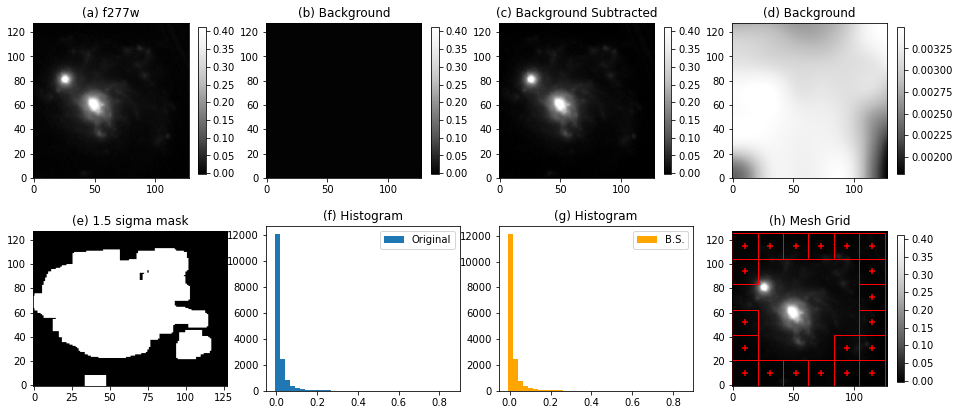


Background =  0.009191141237261965

Background subtracted image saved to /Users/brian.merino/Desktop/JWST/RELICS/BS_files/bs/f277w_5276_bs.fits
Background saved to /Users/brian.merino/Desktop/JWST/RELICS/BS_files/bkg/f277w_5276_bkg.fits



        Use SegmentationImage.make_source_mask instead. [warnings]


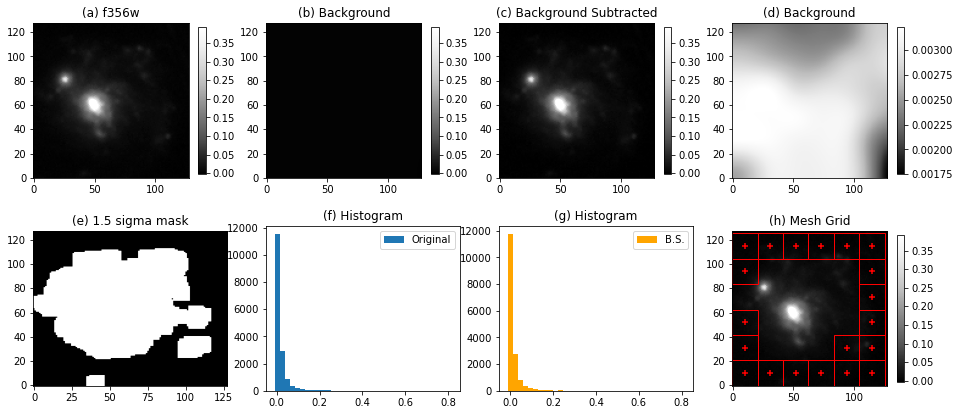


Background =  0.008914299496483683

Background subtracted image saved to /Users/brian.merino/Desktop/JWST/RELICS/BS_files/bs/f356w_5276_bs.fits
Background saved to /Users/brian.merino/Desktop/JWST/RELICS/BS_files/bkg/f356w_5276_bkg.fits



        Use SegmentationImage.make_source_mask instead. [warnings]


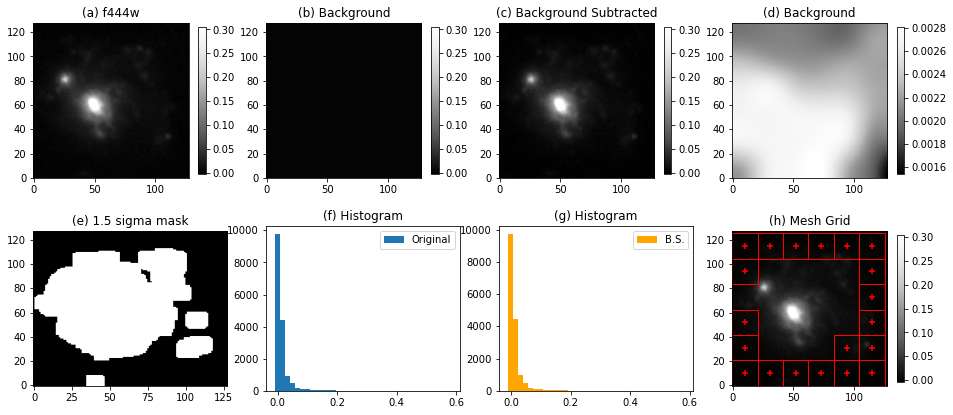


Background =  0.0070659419783149656

Background subtracted image saved to /Users/brian.merino/Desktop/JWST/RELICS/BS_files/bs/f444w_5276_bs.fits
Background saved to /Users/brian.merino/Desktop/JWST/RELICS/BS_files/bkg/f444w_5276_bkg.fits



        Use SegmentationImage.make_source_mask instead. [warnings]


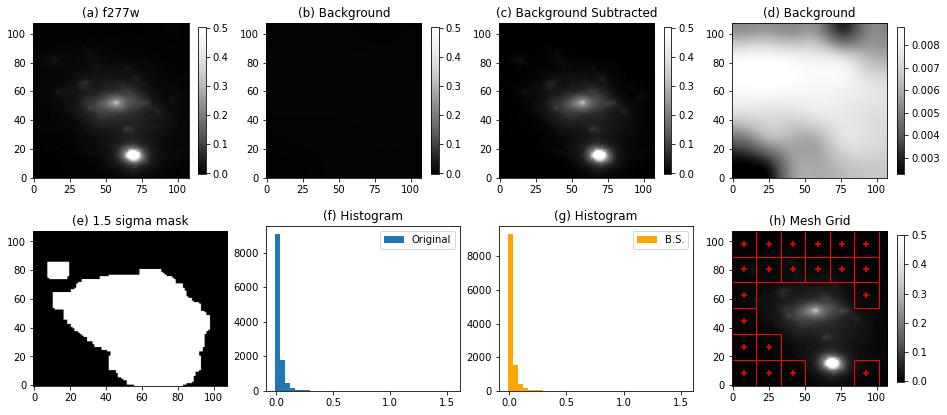


Background =  0.014232299867911972

Background subtracted image saved to /Users/brian.merino/Desktop/JWST/RELICS/BS_files/bs/f277w_5364_bs.fits
Background saved to /Users/brian.merino/Desktop/JWST/RELICS/BS_files/bkg/f277w_5364_bkg.fits



        Use SegmentationImage.make_source_mask instead. [warnings]


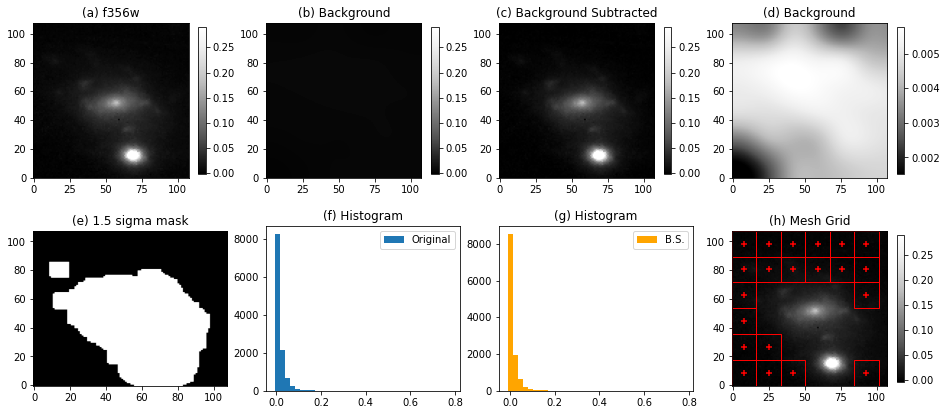


Background =  0.008971838018003867

Background subtracted image saved to /Users/brian.merino/Desktop/JWST/RELICS/BS_files/bs/f356w_5364_bs.fits
Background saved to /Users/brian.merino/Desktop/JWST/RELICS/BS_files/bkg/f356w_5364_bkg.fits



        Use SegmentationImage.make_source_mask instead. [warnings]


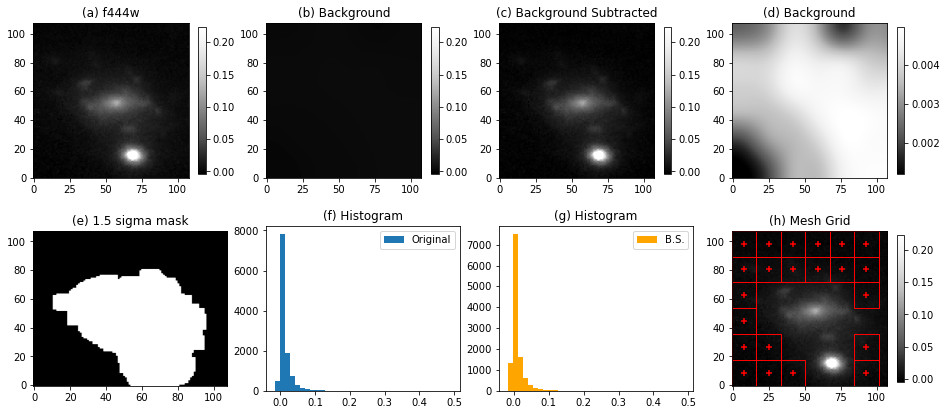


Background =  0.007310643972118984

Background subtracted image saved to /Users/brian.merino/Desktop/JWST/RELICS/BS_files/bs/f444w_5364_bs.fits
Background saved to /Users/brian.merino/Desktop/JWST/RELICS/BS_files/bkg/f444w_5364_bkg.fits

DONE!

116.03 seconds
1.934 minutes


In [5]:
root     = '/Users/brian.merino/Desktop/JWST/RELICS/BS_files/'
sci_root = '/Users/brian.merino/Desktop/JWST/RELICS/thumbnails/sci/'

for i in range(len(catalog)):
    cluster = 'smacs0723'
    ID      = catalog['ID'][i]
    
    for item in FILTER:
        save_bs  = root + 'bs/%s_%s_bs.fits'%(item,ID)
        save_bkg = root + 'bkg/%s_%s_bkg.fits'%(item,ID)
        save_png = root + '%s_%s_bs.png'%(item,ID)

        #Read in the fits files
        image = sci_root + '%s-%s_JWST.fits'%(item,ID)

        # Open the fits files
        pf = astropy.io.fits.open(image)

        # Read the headers
        head = pf[0].header

        # Access the data
        data = pf[0].data

        # This will adjust the strech for the plot
        norm = simple_norm(data, 'linear', percent=99.5)

        # Call the Background function
        # Background(image, head, name, norm, sigma)
        Background(data, head, '%s'%(item) , norm, sigma)

        print()
        print('Background subtracted image saved to '+save_bs)
        print('Background saved to ' +save_bkg)
        print()
    
print('DONE!')

t1 = time.time()
total = t1-t0
total_min = total/60
print()
print(round(total,3), 'seconds')
print(round(total_min,3), 'minutes')    